In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "yunusemretokdemir/customer-segmentation" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\customer-segmentation' already exists with files. Skipping download (replace=False).


In [3]:
files

['PBL5recommendationdata.csv', 'PBL5recommendationdata_cut.csv']

In [48]:
# ---  load data
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")


C:\Users\Anna\AppData\Local\Temp\ipykernel_8352\3234849333.py:2: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")


In [ ]:
# df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=ohne_null_cols, encoding="latin1")
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")
#df = pd.read_csv("/".join(["../data/raw", dataset_name, "PBL5recommendationdata_cut.csv"]), sep=';')

In [49]:
df.head(20)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
5,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,peggy,thompson,NaN,1388155947,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF01527,0.0,NaN
8,8,Randy,Pruss,NaN,1389303216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04706,0.0,NaN
9,10,Tommy,Smith,NaN,1390509516,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Customers.create_date,4194.0,1.440971e+09,1.887681e+07,1.386089e+09,1.427323e+09,1.446412e+09,1.456955e+09,1.463418e+09
Customers.status,101.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Customers.mailing,2114.0,9.796594e-01,1.411959e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Customers.reminders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Products.shipping_weight,659.0,1.548704e+01,2.225662e+01,2.000000e-02,2.775000e+00,8.900000e+00,2.100000e+01,1.750000e+02
Products.google_shopping_label,387.0,3.863049e+00,2.098446e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Products.leg_style,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products.saved_status,3930.0,8.763359e-01,1.364374e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00


In [ ]:
cols_with_date = [col for col in df.columns if ("date" in col.lower()) or ("modified" in col.lower())]
cols_with_date

['Customers.create_date',
 'Orders.payment_date',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date']

In [ ]:
date_cols = [
    'Customers.create_date',
    'Customers.last_modified',
    'Orders.placed_date',
    'Orders.payment_date',
    'Orders.updated_date',
    'Orders.shipped_date',
    'Products.last_modified',
    'Products.qb_edit_sequence'
]


In [ ]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], unit='s').dt.round('s')

In [55]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.518121,3.0,865.25,1747.5,2698.75,3736.0,1065.67909
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.status,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customers.mailing,2114.0,0.979659,0.0,1.0,1.0,1.0,1.0,0.141196
Customers.reminders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Products.shipping_weight,659.0,15.487041,0.02,2.775,8.9,21.0,175.0,22.256617
Products.google_shopping_label,387.0,3.863049,0.0,5.0,5.0,5.0,5.0,2.098446
Products.leg_style,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products.saved_status,3930.0,0.876336,0.0,0.0,0.0,3.0,3.0,1.364374


In [56]:
#standarte Zelle

display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 181)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.status,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.reminders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Products.shipping_weight,659.0,15.49,0.02,2.78,8.9,21.0,175.0,22.26
Products.google_shopping_label,387.0,3.86,0.0,5.0,5.0,5.0,5.0,2.1
Products.leg_style,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products.saved_status,3930.0,0.88,0.0,0.0,0.0,3.0,3.0,1.36


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[3365, 218, 2906]"
Customers.fname,object,0,1631,"[Cindy, Anita, HALIMAH]"
Customers.lname,object,0,2557,"[Belluomo, Cline, Chen]"
Customers.company,object,3467,425,"[nan, nan, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2014-10-26 15:39:18, 2016-02-12 16:37:45, 201..."
...,...,...,...,...
Products.leg_style,float64,4194,0,"[nan, nan, nan]"
Products.seat_size,object,4032,13,"[nan, nan, nan]"
Products.family_id,object,325,1002,"[PF21897, PF03136, PF06517]"
Products.saved_status,float64,264,2,"[0.0, 0.0, 0.0]"


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: datetime64[ns](8), float64(93), int64(7), object(73)
memory usage: 5.8+ MB


In [58]:
# Check the completeness of the main ID fields 
# (Customers.id, Orders.id, Products.id, Order_Items.id) 
# by counting missing values

cols = ['Customers.id', 'Orders.id', 'Products.id', 'Order_Items.id']
df[cols].isna().sum()

Customers.id        0
Orders.id           0
Products.id       157
Order_Items.id      0
dtype: int64

In [ ]:
### ---  Selecting the most relevant columns for further analysis --- 
# ---  % null
null_value = (df.isna().mean() * 100).sort_values(ascending=False)
null_value.head(50)

Customers.reminders              100.000000
Customers.sales_rep              100.000000
Customers.rewards                100.000000
Customers.profile_id             100.000000
Orders.sales_rep                 100.000000
Orders.shipping_flags            100.000000
Orders.gift_id                   100.000000
Orders.purchase_order            100.000000
Orders.shipping_trans            100.000000
Orders.gift_amount               100.000000
Products.menu_name               100.000000
Order_Items.account_id           100.000000
Order_Items.registry_item        100.000000
Order_Items.attributes           100.000000
Order_Items.attribute_prices     100.000000
Order_Items.related_id           100.000000
Orders.mailing                   100.000000
Orders.registry_id               100.000000
Orders.gift_message              100.000000
Orders.website                   100.000000
Orders.payment_ref               100.000000
Products.price_break_type        100.000000
Products.product_type           

In [ ]:
### --- Selecting the relevant columns for further analysis --- 

# less than 95% null values 
ohne_null_cols = null_value[null_value < 95].index.tolist()
len(ohne_null_cols)
ohne_null_cols



['Customers.reminders',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Orders.sales_rep',
 'Orders.shipping_flags',
 'Orders.gift_id',
 'Orders.purchase_order',
 'Orders.shipping_trans',
 'Orders.gift_amount',
 'Products.menu_name',
 'Order_Items.account_id',
 'Order_Items.registry_item',
 'Order_Items.attributes',
 'Order_Items.attribute_prices',
 'Order_Items.related_id',
 'Orders.mailing',
 'Orders.registry_id',
 'Orders.gift_message',
 'Orders.website',
 'Orders.payment_ref',
 'Products.price_break_type',
 'Products.product_type',
 'Products.right_flag',
 'Products.google_adwords',
 'Products.amazon_type',
 'Products.leg_style',
 'Products.default_quantity',
 'Products.markup',
 'Products.freight_cost',
 'Products.price_breaks',
 'Products.audio',
 'Products.websites',
 'Products.seo_footer',
 'Orders.flags',
 'Products.shopping_age',
 'Products.features_title',
 'Customers.account_id',
 'Orders.weight',
 'Orders.external_id',
 'Customers.tax_exempt',
 'Pr

In [62]:
# Select a few columns that have few values but may still be useful, for example re-orders

df.head(10)
high_null_cols = null_value[null_value > 95].index.tolist()

print(len(high_null_cols))

high_null_cols

# ---  drop high null columns
#df = df.drop(columns=high_null_cols)

52


['Customers.reminders',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Orders.sales_rep',
 'Orders.shipping_flags',
 'Orders.gift_id',
 'Orders.purchase_order',
 'Orders.shipping_trans',
 'Orders.gift_amount',
 'Products.menu_name',
 'Order_Items.account_id',
 'Order_Items.registry_item',
 'Order_Items.attributes',
 'Order_Items.attribute_prices',
 'Order_Items.related_id',
 'Orders.mailing',
 'Orders.registry_id',
 'Orders.gift_message',
 'Orders.website',
 'Orders.payment_ref',
 'Products.price_break_type',
 'Products.product_type',
 'Products.right_flag',
 'Products.google_adwords',
 'Products.amazon_type',
 'Products.leg_style',
 'Products.default_quantity',
 'Products.markup',
 'Products.freight_cost',
 'Products.price_breaks',
 'Products.audio',
 'Products.websites',
 'Products.seo_footer',
 'Orders.flags',
 'Products.shopping_age',
 'Products.features_title',
 'Customers.account_id',
 'Orders.weight',
 'Orders.external_id',
 'Customers.tax_exempt',
 'Pr

In [ ]:
# ---  check not correct characters in NAME

mismatch = df[
    (df['Orders.lname'] != df['Customers.lname']) |
    (df['Orders.fname'] != df['Customers.fname'])
]

mismatch = mismatch.reset_index(drop=True)

mismatch[[
    'Customers.id',
    'Customers.fname', 'Orders.fname',
    'Customers.lname', 'Orders.lname'
]]

,Customers.id,Customers.fname,Orders.fname,Customers.lname,Orders.lname
0,5,Abraham,Abe,Pollak,Pollak
1,100,Arlene,Luis,Maldonado,Moriel.a
2,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
3,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
4,308,James,James,James,Watson
5,453,Herbert M,Matthew,Levy,Levy
6,453,Herbert M,Matthew,Levy,Levy
7,708,Brian,Joshua,Kuester,Olson
8,789,Michael D,Michael,Swedberg,Swedberg
9,904,Margaret,Margaret,Pyler,Tyler


In [ ]:
# ---  check not correct characters in 'Orders.fname' ---

mask = df['Orders.fname'].str.contains(r'[^a-zA-Z0-9\s\-\'\., ]', regex=True, na=False)
df_bad = df[mask]
df_bad

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2255,1895,Maryjane Zimmermann/,Elizabeth Schmidt,NaN,2015-12-07 19:19:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF06356,0.0,NaN
2842,2416,Ridgewood High School c/o,Thomas Parrillo,NaN,2016-02-04 16:07:09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",PF05425,3.0,NaN


In [ ]:
# check ID
mismatch = df[(df['Customers.id'] != df['Orders.customer_id'])]
mismatch[['Customers.id']]

,Customers.id


In [ ]:
## ---  Check unique counts: FLAGs ---

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 10) ]


Customers.mailing                 2
Customers.tax_exempt              2
Customers.account_id              2
Customers.customer_type           3
Orders.external_source            3
Orders.external_id                3
Orders.weight                     2
Orders.payment_status             3
Orders.payment_user               5
Orders.payment_type               5
Orders.payment_method             4
Orders.partial_ship               2
Orders.customer_type              3
Order_Items.reorder_frequency     4
Order_Items.flags                 2
Products.status                   5
Products.template                 2
Products.vendor                   8
Products.flags                    9
Products.left_flag                5
Products.taxable                  2
Products.shopping_flags           7
Products.google_shopping_cat      5
Products.seo_header               2
Products.rx                       2
Products.latex                    9
Products.override_markup          2
Products.hygienic           

In [ ]:
# list columns with "id"

cols_with_id = [col for col in df.columns if "id" in col.lower()]
cols_with_id

['Customers.id',
 'Customers.account_id',
 'Customers.profile_id',
 'Orders.id',
 'Orders.customer_id',
 'Orders.reorder_id',
 'Orders.external_id',
 'Orders.coupon_id',
 'Orders.gift_id',
 'Orders.payment_id',
 'Orders.registry_id',
 'Order_Items.id',
 'Order_Items.product_id',
 'Order_Items.related_id',
 'Order_Items.account_id',
 'Products.id',
 'Products.import_id',
 'Products.google_shopping_id',
 'Products.quickbooks_id',
 'Products.video',
 'Products.width',
 'Products.override_markup',
 'Products.shipping_width',
 'Products.family_id']

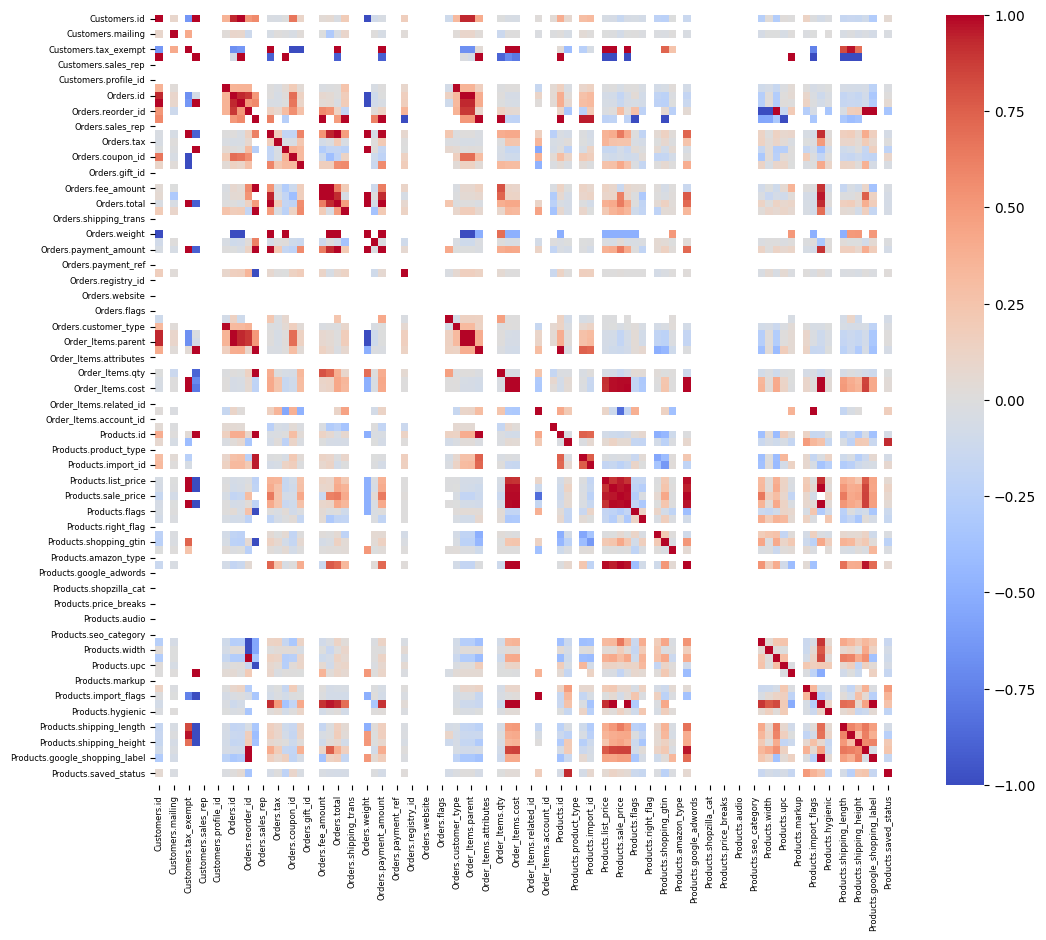

In [36]:
plt.figure(figsize=(12, 10), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.show()

In [ ]:
### ---  Selecting the most relevant columns for further analysis --->

cols_use = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.external_source", "Orders.external_id", "Orders.subtotal",
    "Orders.tax", "Orders.shipping", "Orders.coupon_id", "Orders.coupon_amount",
    "Orders.discount_name",
    "Orders.discount_amount", "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_status",
    "Orders.payment_date", "Orders.payment_user", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", "Orders.payment_id",
    "Orders.payment_code", "Orders.status", "Orders.placed_date",
    "Orders.updated_date", "Orders.shipped_date", "Orders.comments",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_color", "Products.quickbooks_id", "Products.qb_edit_sequence", 
    "Products.short_description", "Products.unit", "Products.packaging", 
    "Products.display_packaging", "Products.multiple", "Products.latex", 
    "Products.case_qty", "Products.notes", 
    "Products.map_price", "Products.family_id"
]

df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


In [ ]:
date_cols = [
    'Customers.create_date',
    'Customers.last_modified',
    'Orders.placed_date',
    'Orders.payment_date',
    'Orders.updated_date',
    'Orders.shipped_date',
    'Products.last_modified',
    'Products.qb_edit_sequence'
]

# Convert Unix timestamp to datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col], unit='s').dt.round('s')

In [ ]:
blacklist = ['Orders.external_id', 'Orders.external_source', 'Orders.payment_user', 
            'Orders.payment_id', 'Orders.payment_code', 'Orders.comments',   
            'Products.quickbooks_id', 'Products.qb_edit_sequence','Products.display_packaging',
            'Products.short_description', 'Products.notes', 'Products.multiple',
            'Products.latex', 'Products.map_price'
            ] 

df = df.drop(columns=blacklist)

In [ ]:
df.columns.tolist()

In [ ]:
cols_use = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.subtotal", "Orders.tax", "Orders.shipping", "Orders.coupon_id", 
    "Orders.coupon_amount", "Orders.discount_name", "Orders.discount_amount", 
    "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method",  "Orders.shipped_date", 
    "Orders.payment_status", "Orders.payment_date", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", 
    "Orders.status", "Orders.placed_date", "Orders.updated_date",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_color", "Products.unit", "Products.packaging", 
    "Products.case_qty", "Products.family_id"
]